# Visualising tweets of IPL 2016 (without much programming)

## Registering Twitter application.

First, you'll want to head over to https://dev.twitter.com/apps and register an application!

1) Fill Credentials:

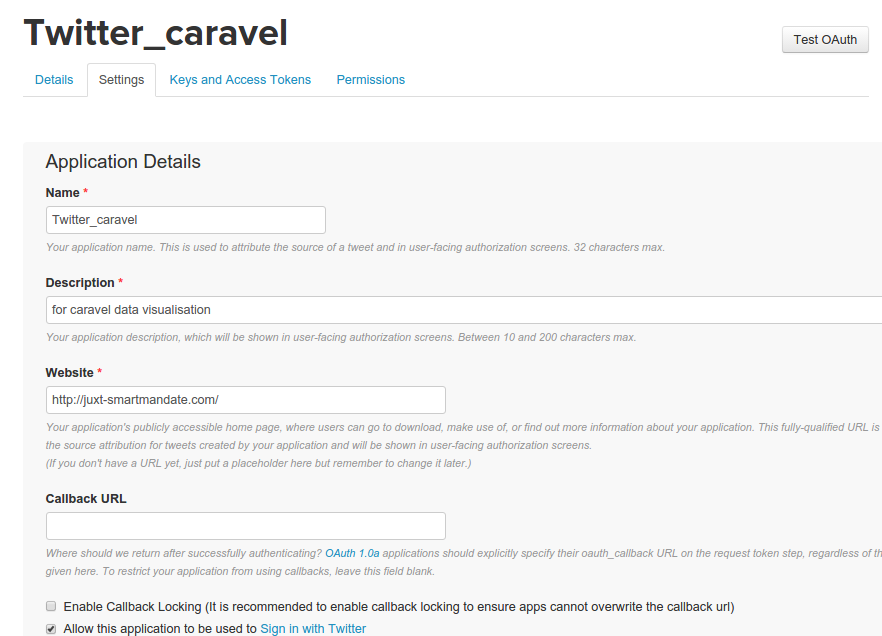

In [3]:
Image(filename='/home/nipun/Pictures/Twitter_registering_application.png')

2) Get key for your apps:

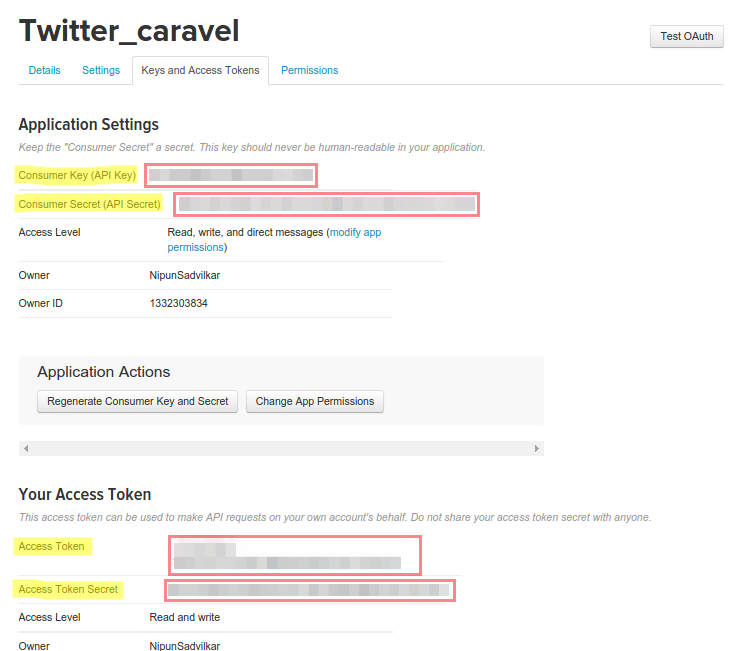

In [5]:
Image('/home/nipun/Pictures/Twitter_OAuth.png')

## Scraping Tweets

Necessary python packages: <br>
Tweepy: <https://github.com/tweepy/tweepy>

`$pip install tweepy`


In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
consumer_key= "################"
consumer_secret = "################"
access_token = "################"
access_token_secret= "################"
tweet_file_path="/home/nipun/Downloads/Twitter_scrape/Twitter_scrape.txt"
tweet_file_handle=open(tweet_file_path,"a")

#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        tweet_file_handle.write(str(data)+"\n")
        return True

    def on_error(self, status):
        print status



#This handles Twitter authetification and the connection to Twitter Streaming API
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

#This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
stream.filter(track=['IPL2016'])

# Configure your python file and write that data inside text file

for storing data<br>

`$python twitter_streaming.py > twitter_data.txt`

## JSON Format

* JSON is a syntax for storing and exchanging data.
* JSON is "self-describing" and easy to understand ( I am not kidding! ) > Let's Visualise it.
* Key values kind of structure.

## Data preprocessing and cleaning

### 1. Extracting main data from JSON

In [33]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = '/home/nipun/Downloads/Twitter_scrape/Twitter_scrape.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

1033


In [13]:
tweets_df = pd.DataFrame()
tweets_df['Username'] = map(lambda tweet: tweet['user']['name'], tweets_data)
tweets_df['statuses_count'] = map(lambda tweet: tweet['user']['statuses_count'], tweets_data)
tweets_df['friends_count'] = map(lambda tweet: tweet['user']['friends_count'], tweets_data)
tweets_df['followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets_df['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets_df['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets_df['location'] = map(lambda tweet: tweet['user']['location'], tweets_data)
tweets_df['created_at'] = map(lambda tweet: tweet['created_at'], tweets_data)

In [21]:
tweets_df.dtypes

Username           object
statuses_count      int64
friends_count       int64
followers_count     int64
text               object
lang               object
location           object
created_at         object
dtype: object

# Converting created_at datatype from Object to Datetime

In [26]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'].astype(str))
tweets_df.dtypes

Username                   object
statuses_count              int64
friends_count               int64
followers_count             int64
text                       object
lang                       object
location                   object
created_at         datetime64[ns]
dtype: object

In [27]:
tweets_df.head()

,Username,statuses_count,friends_count,followers_count,text,lang,location,created_at
0,priyanka,36122,360,10925,RT @HEScreamSquad: Glenn Maxwell has taken a b...,en,india,2016-04-23 08:27:25
1,MIK,17959,12676,12558,RT @HEScreamSquad: Glenn Maxwell has taken a b...,en,"New Delhi, India",2016-04-23 08:27:29
2,Suri Bishnoi,4245,112,510,RT @rajnish4587: #DDvMI #MIvsDD #IPL2016 #IPL9...,en,"Jaipur, India",2016-04-23 08:27:34
3,Hetal Vin,102131,1430,2606,@INBakwas #INBakwasIPL #IPL2016 #SRHvsKXIP\n ...,en,"Surat, Gujarat",2016-04-23 08:27:55
4,Vishvatimes,32961,73,4523,#आईपीएल : बेंगलोर ने पुणे को 13 रनों से हराया\...,hi,भारत,2016-04-23 08:27:56


In [34]:
tweets_df.to_csv('/home/nipun/Downloads/Test_Twitter/Twitter_scrape.csv',encoding='utf-8')

In [29]:
tweets_df['Username'].value_counts()

The Gujarat Lions FC    32
Pune Supergiants FC     25
#IPL09                  19
❎✖©Company_420™®✖❎      15
Nazim Inamdar           13
IPL 2016 Tweets         11
vimalasubramanian       10
#VIVOIPL #IPL2016       10
Sradha Jena              9
#IPLT20 #IPL2016         8
Amey Bhosale             8
girijakriz               7
Kaptaan Kohli            6
sumit kumar              6
S K Sangwan              6
Modestologie             6
Sir Rohit Sharma         6
Thank You Prince         6
Passion❤FruiT            6
#NeverGiveUp             5
toma roy                 5
News Hunter              5
Cricket Trolls           5
`NigHtinGale°~°          5
ICC Live Scores          5
Golden Arrow             5
Sachin Tater             4
Aparna ツ                 4
Kamlesh                  4
ThatCricketGuy           4
                        ..
Mahesh Tikky             1
ICA Edu Skills           1
CHIRU                    1
#HOConZCafe              1
ADITYA SUMAN             1
Uzma Khan                1
a

# Data cleaning

In [41]:
new_tweet_df = pd.read_csv('/home/nipun/Downloads/Test_Twitter/Twitter_IPL2016.csv',header=0)
new_tweet_df['location'].value_counts()[0:20]

India                      951
Mumbai                     139
New Delhi                  107
Bangalore                   84
Rajkot                      76
Pune                        70
Hyderabad                   43
Cricket✔                    38
Global                      33
Chennai                     25
Pakistan                    25
Nepal                       23
Ahmedabad                   10
samastipur ( Bihar )        10
Kolkata, India              10
Trivandrum, India            9
Hisar (Haryanna) India.      9
cricket heart ❤              9
200 country                  9
india                        8
dtype: int64

In [40]:
#for simplicity in visualisation we will take only those locations 
#where count is greater than or equal to 10
tweet_filter_df = new_tweet_df.groupby("location").filter(lambda x: len(x) >= 10)
tweet_filter_df['location'].value_counts()

India                    951
Mumbai                   139
New Delhi                107
Bangalore                 84
Rajkot                    76
Pune                      70
Hyderabad                 43
Cricket✔                  38
Global                    33
Pakistan                  25
Chennai                   25
Nepal                     23
Kolkata, India            10
samastipur ( Bihar )      10
Ahmedabad                 10
dtype: int64

In [43]:
tweet_filter_df['lang'].value_counts()

en     1426
in       55
hi       43
und      41
et       24
da       23
cy       10
fi        5
tl        5
fr        4
mr        2
es        1
ml        1
bn        1
ht        1
de        1
lv        1
dtype: int64

In [51]:
tweet_filter_df['created_at'] = pd.to_datetime(tweet_filter_df['created_at'].astype(str))
tweet_filter_df.dtypes
tweet_filter_df.to_csv('/home/nipun/Downloads/Test_Twitter/Finished_Twitter_IPL2016.csv',index=0,encoding='utf-8')

# Ordinary way to visualise data

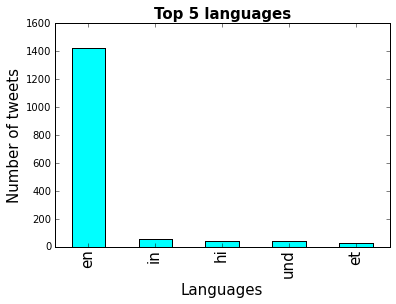

In [44]:
tweets_by_lang = tweet_filter_df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='cyan')